# Visualizing HSIC Measures

In [3]:
import sys, os
import warnings
import tqdm
import random
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Insert path to model directory,.
cwd = os.getcwd()
path = f"{cwd}/../../src"
sys.path.insert(0, path)

# toy datasets
from data.toy import generate_dependence_data

# Kernel Dependency measure
from models.dependence import HSIC
from models.kernel import estimate_sigma, sigma_to_gamma, gamma_to_sigma, get_param_grid

# RBIG IT measures
from models.ite_algorithms import run_rbig_models

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

warnings.filterwarnings('ignore') # get rid of annoying warnings

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
!ls /home/emmanuel/projects/2019_hsic_align/results/hsic/

dist_v1_belkin.csv   gamma_v1_median_f1.csv  scale_v1.csv
dist_v1_gamma.csv    gamma_v1_median_f2.csv  trial_large_v1.csv
dist_v2_belkin.csv   large_v2_silv.csv	     trial_v2_s20k.csv
dist_v4_median.csv   large_v3_silv.csv	     trial_v3.csv
figures		     large_v4_mean.csv
gamma_v1_median.csv  large_v4_silv.csv


In [22]:
save_path   = f'/home/emmanuel/projects/2019_hsic_align/results/hsic/'
save_name   = 'gamma_v1_median_f2'

results_df = pd.read_csv(f"{save_path}{save_name}.csv")

In [23]:
results_df.tail()

,Unnamed: 0,trial,function,noise,init_gamma,gamma,scorer,value,mi
29995,29995,1,rand,0.501187,5.809637,0.123220,ctka,0.000252,0.009215
29996,29996,1,rand,0.501187,5.809637,0.102105,ctka,0.000253,0.009215
29997,29997,1,rand,0.501187,5.809637,0.084609,ctka,0.000253,0.009215
29998,29998,1,rand,0.501187,5.809637,0.070110,ctka,0.000254,0.009215
29999,29999,1,rand,0.501187,5.809637,0.058096,ctka,0.000254,0.009215


In [24]:
res_noise = results_df['noise'].unique().tolist()
res_gammas = results_df['gamma'].unique().tolist()
res_lines = results_df['function'].unique().tolist()

## Figure I - Mutual Information & Noise

This first figure is to demonstrate how the mutual information compares with the amount of noise for each of the functions **Linear**, **Sinusoidal**, **Circular**, and **Random**.

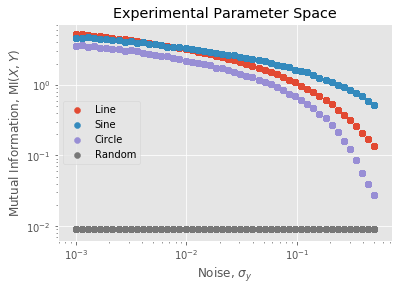

In [25]:
fig, ax = plt.subplots()
ax.scatter(
    results_df[results_df['function'] == 'line']['noise'], 
    results_df[results_df['function'] == 'line']['mi'],
    label='Line'
)
plt.xscale('log')
plt.yscale('log')

ax.scatter(
    results_df[results_df['function'] == 'sine']['noise'], 
    results_df[results_df['function'] == 'sine']['mi'], 
    label='Sine'
)
plt.xscale('log')
plt.yscale('log')


ax.scatter(
    results_df[results_df['function'] == 'circ']['noise'], 
    results_df[results_df['function'] == 'circ']['mi'], 
    label='Circle'
)

plt.xscale('log')
plt.yscale('log')

ax.scatter(
    results_df[results_df['function'] == 'rand']['noise'], 
    results_df[results_df['function'] == 'rand']['mi'], 
    label='Random'
)

plt.xscale('log')
plt.yscale('log')

ax.set_xlabel('Noise, $\sigma_y$')
ax.set_ylabel('Mutual Information, MI$(X,Y)$')
# ax.set_xscale('log')
plt.legend()
ax.set_title('Experimental Parameter Space')
plt.show()

In [26]:
def plot_res_gamma(results_df, function='line', hsic_method='hsic'):
    
    save_path = f'{cwd}/../../results/figures/gamma_param/'
    
    # Set Title stuff
    if function == 'line':
        title = 'Linear Function'
    elif function == 'sine':
        title = 'Sine Function'
    elif function == 'circ':
        title = 'Circle Function'
    elif function == 'rand':
        title = 'Random Function'
    else:
        raise ValueError(f'Unrecognized function: {line}')
        
    sub_results_df = results_df[results_df['function'] == function]
    free_params = [
    #     'gamma',
        'function'
    ]

    fixed_params = [
        'gamma',
        'value',
        'method',
        'mi'
    ]
    
    groups = sub_results_df.groupby(free_params)
    
    hue = 'gamma'

    fig, ax = plt.subplots(nrows=1, figsize=(7, 3))


    for iparams, idata in groups:

        # Plot I - HSIC
        pts = ax.scatter(
            x=idata[idata['scorer']== hsic_method]['value'],
            y=idata[idata['scorer']== hsic_method]['mi'],
            c=idata[idata['scorer']== hsic_method]['gamma'],
            s=20, cmap='Spectral',
            norm=matplotlib.colors.LogNorm()
        )
        ax.set_xlabel( hsic_method.upper() )
        ax.set_ylabel('Mutual Information')
        fig.colorbar(pts, ax=ax, label='Gamma')

    # ax[0].get_legend().remove()
    # ax[1].get_legend().remove()
    # ax[2].get_legend().remove()
    ax.set_yscale('log')
    ax.set_title(title)
    plt.tight_layout()
    plt.show()
    
    fig.savefig(f"{save_path}trialv1_{function}_{hsic_method}.png")
    
    return None

### Figure II - MI vs Gamma vs HSIC (Linear Function)

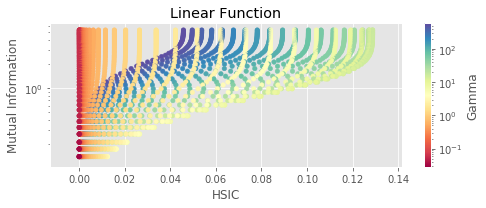

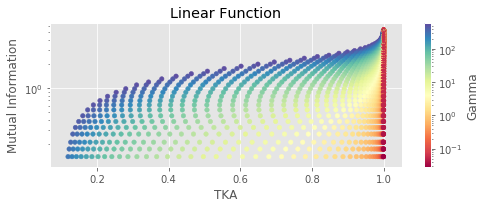

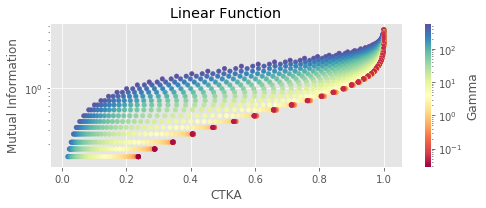

In [27]:
plot_res_gamma(results_df, function='line', hsic_method='hsic')
plot_res_gamma(results_df, function='line', hsic_method='tka')
plot_res_gamma(results_df, function='line', hsic_method='ctka')

### Case II - Sine


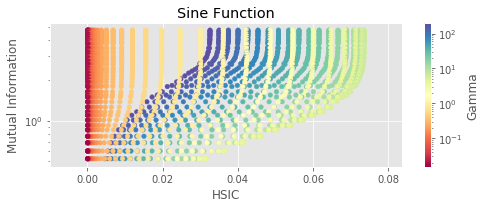

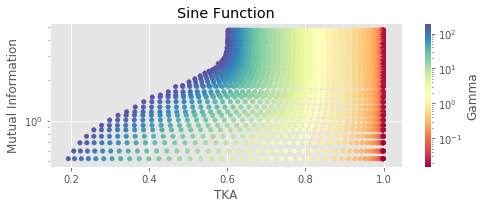

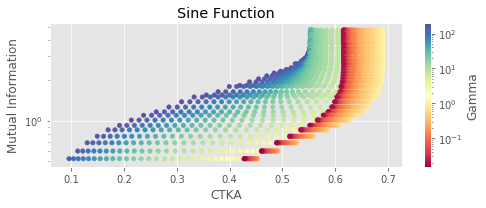

In [28]:
plot_res_gamma(results_df, function='sine', hsic_method='hsic')
plot_res_gamma(results_df, function='sine', hsic_method='tka')
plot_res_gamma(results_df, function='sine', hsic_method='ctka')

### Case III - Circle

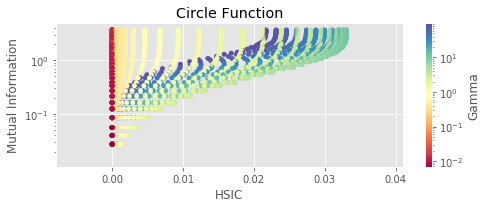

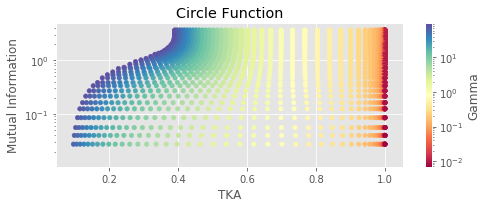

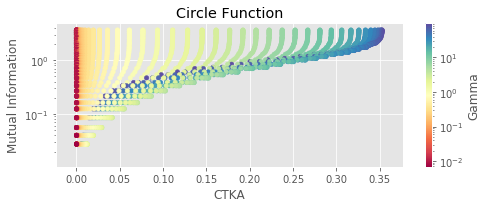

In [29]:
plot_res_gamma(results_df, function='circ', hsic_method='hsic')
plot_res_gamma(results_df, function='circ', hsic_method='tka')
plot_res_gamma(results_df, function='circ', hsic_method='ctka')

### Case IV - Random

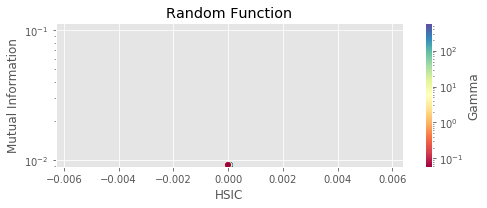

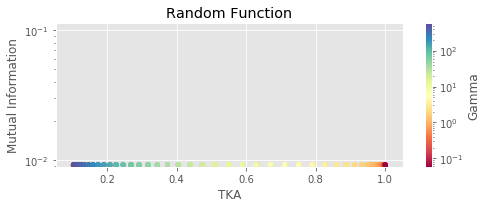

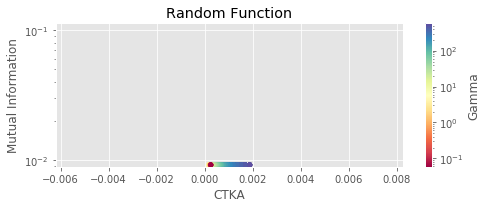

In [30]:
plot_res_gamma(results_df, function='rand', hsic_method='hsic')
plot_res_gamma(results_df, function='rand', hsic_method='tka')
plot_res_gamma(results_df, function='rand', hsic_method='ctka')